In [29]:
import os
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
DATA_PATH = "data"
l = os.listdir(DATA_PATH + "/")
d = []
for i in l:
    if i.endswith("stackexchange.com"):
        x = i.split(".")
        d.append([x[0], "{}/{}/Tags.xml".format(DATA_PATH, i)])

In [11]:
d

[['matheducators', 'data/matheducators.stackexchange.com/Tags.xml'],
 ['cseducators', 'data/cseducators.stackexchange.com/Tags.xml'],
 ['cs', 'data/cs.stackexchange.com/Tags.xml']]

In [31]:
t = {}
edge_list = []

for i in d:
    domain = i[0]
    with open(i[1], "r") as fp:
        z = fp.read()
        s = BeautifulSoup(z, "lxml")
        r = s.find_all("row", {"tagname": not None})
        c = len(r)
        for j in r:
            if j["tagname"] not in t:
                t[j["tagname"]] = list()
            
            t[j["tagname"]].append({domain: float(int(j["count"]) / c)})
            edge_list.append((j["tagname"], domain, {"count": float(int(j["count"]) / c)}))


for i in t:
    if len(t[i]) > 1:
        print(i, t[i])

classroom-management [{'matheducators': 0.18867924528301888}, {'cseducators': 0.09134615384615384}]
homework [{'matheducators': 0.28773584905660377}, {'cseducators': 0.038461538461538464}]
testing [{'matheducators': 0.12735849056603774}, {'cs': 0.026359143327841845}]
mathematical-analysis [{'matheducators': 0.3113207547169811}, {'cs': 0.11696869851729819}]
undergraduate-research [{'matheducators': 0.14150943396226415}, {'cseducators': 0.004807692307692308}]
reference-request [{'matheducators': 0.9575471698113207}, {'cs': 1.3756177924217463}]
exams [{'matheducators': 0.37264150943396224}, {'cseducators': 0.04326923076923077}]
statistics [{'matheducators': 0.22641509433962265}, {'cs': 0.16474464579901152}]
advising [{'matheducators': 0.08018867924528301}, {'cseducators': 0.004807692307692308}]
assessment [{'matheducators': 0.23113207547169812}, {'cseducators': 0.07211538461538461}]
real-numbers [{'matheducators': 0.05660377358490566}, {'cs': 0.06589785831960461}]
linear-algebra [{'mathed

In [32]:
G = nx.Graph()
G.add_edges_from(edge_list)

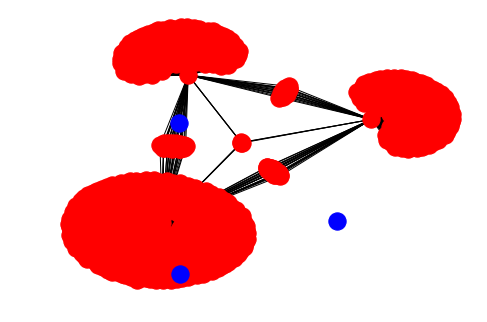

In [35]:
nx.draw(G)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes([i[0] for i in d], pos, node_color="b")
plt.show()

In [36]:
edge_list

[('classroom-management', 'matheducators', {'count': 0.18867924528301888}),
 ('interactive-teaching', 'matheducators', {'count': 0.19339622641509435}),
 ('class-participation', 'matheducators', {'count': 0.1179245283018868}),
 ('proofs', 'matheducators', {'count': 0.5754716981132075}),
 ('course-design', 'matheducators', {'count': 0.5518867924528302}),
 ('homework', 'matheducators', {'count': 0.28773584905660377}),
 ('tutoring', 'matheducators', {'count': 0.2830188679245283}),
 ('calculus', 'matheducators', {'count': 1.2924528301886793}),
 ('examples', 'matheducators', {'count': 0.47641509433962265}),
 ('textbooks', 'matheducators', {'count': 0.6650943396226415}),
 ('oral-exams', 'matheducators', {'count': 0.02830188679245283}),
 ('testing', 'matheducators', {'count': 0.12735849056603774}),
 ('aids', 'matheducators', {'count': 0.0330188679245283}),
 ('mathematical-analysis', 'matheducators', {'count': 0.3113207547169811}),
 ('geometry', 'matheducators', {'count': 0.5801886792452831}),
